# Sales Data Analysis (2019)

This notebook performs an analysis of 2019 sales data to identify key trends and patterns.

## 1. Importing necessary libraries.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib as Path

##2. Data Loading and Preparation

This section focuses on loading the sales data from multiple files.

In [3]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year = '2019'
adf = pd.DataFrame()

for month in months:
  file_name = f'Sales_{month}_{year}.csv'
  try:
    df = pd.read_csv(file_name)
    adf = pd.concat([adf, df], ignore_index=True)
  except FileNotFoundError:
    print(f"File not found: {file_name}")

print(adf)


       Order ID                     Product Quantity Ordered Price Each  \
0        141234                      iPhone                1        700   
1        141235    Lightning Charging Cable                1      14.95   
2        141236            Wired Headphones                2      11.99   
3        141237            27in FHD Monitor                1     149.99   
4        141238            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   319666    Lightning Charging Cable                1      14.95   
186846   319667       AA Batteries (4-pack)                2       3.84   
186847   319668             Vareebadd Phone                1        400   
186848   319669            Wired Headphones                1      11.99   
186849   319670  Bose SoundSport Headphones                1      99.99   

            Order Date                        Purchase Address  
0       01/22/19 21:25         944

## 3. Data Cleaning and Transformation

Here, we clean the column names, convert data types, handle missing values, and create new features for analysis.

*Checking for null values and remove them*

In [4]:
adf.isnull().sum()
adf = adf.dropna()

*cleaning the column names.*

In [8]:
adf.columns = adf.columns.str.lower()
adf.columns = adf.columns.str.replace(' ', '_')
adf.columns = adf.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

In [ ]:
adf.dtypes #checking data type

,0
order_id,object
product,object
quantity_ordered,object
price_each,object
order_date,object
purchase_address,object


*convert data types*

In [9]:
adf['order_date'] = pd.to_datetime(adf['order_date'], format='%m/%d/%y %H:%M', errors='coerce')
adf['quantity_ordered'] = pd.to_numeric(adf['quantity_ordered'], errors='coerce')
adf['price_each'] = pd.to_numeric(adf['price_each'], errors='coerce')


*creating new variable for analysis*

In [10]:
adf['month'] = adf['order_date'].dt.month
adf['sales'] = adf['quantity_ordered']*adf['price_each']
adf['citys'] = adf['purchase_address'].str.split(',').str[1].str.strip()

# 4. Exploratory Data Analysis (EDA)

###This section explores different aspects of the sales data through visualizations and summary statistics.


## 4.1 Monthly Sales Analysis

Analyzing and visualizing the total sales for each month of 2019.


In [11]:
monthly_sales = adf.groupby('month')['sales'].sum()
print(monthly_sales)

month
1.0     1822256.73
2.0     2202022.42
3.0     2807100.38
4.0     3390670.24
5.0     3152606.75
6.0     2577802.26
7.0     2647775.76
8.0     2244467.88
9.0     2097560.13
10.0    3736726.88
11.0    3199603.20
12.0    4613443.34
Name: sales, dtype: float64


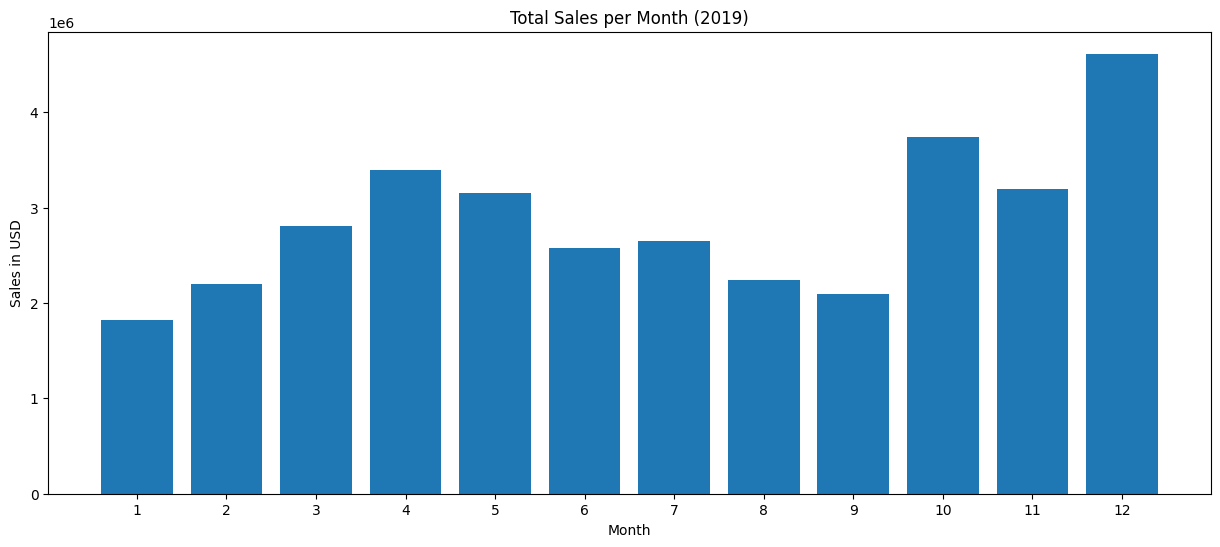

In [12]:
months = range(1, 13)
plt.figure(figsize=(15,6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.title('Total Sales per Month (2019)')
plt.show()

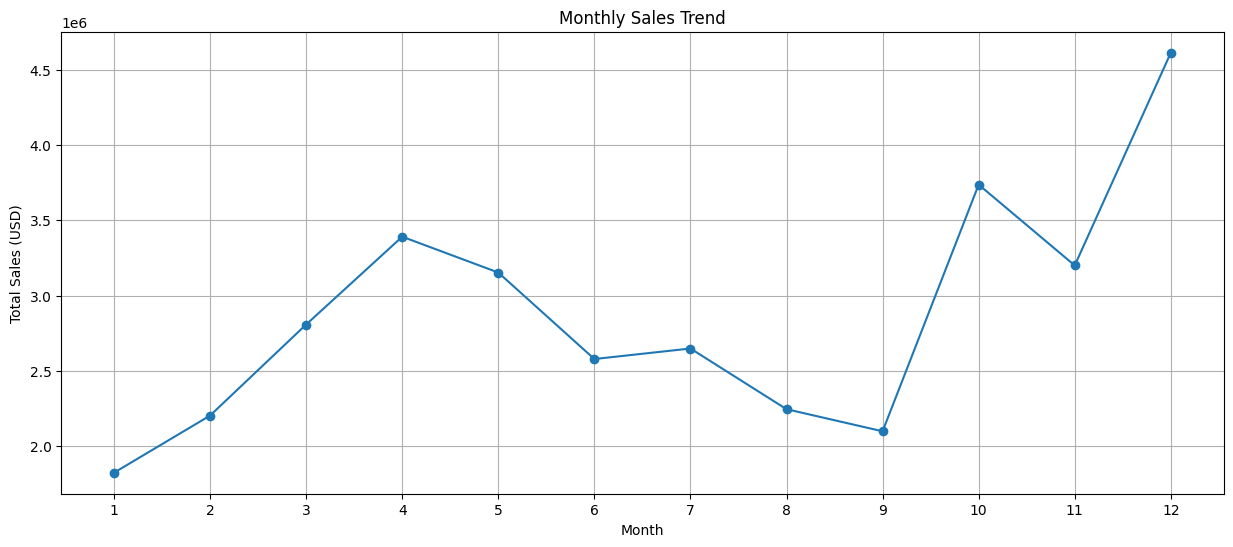

In [13]:
plt.figure(figsize=(15,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()


### 4.2 Sales by City Analysis

Investigating sales performance across different cities

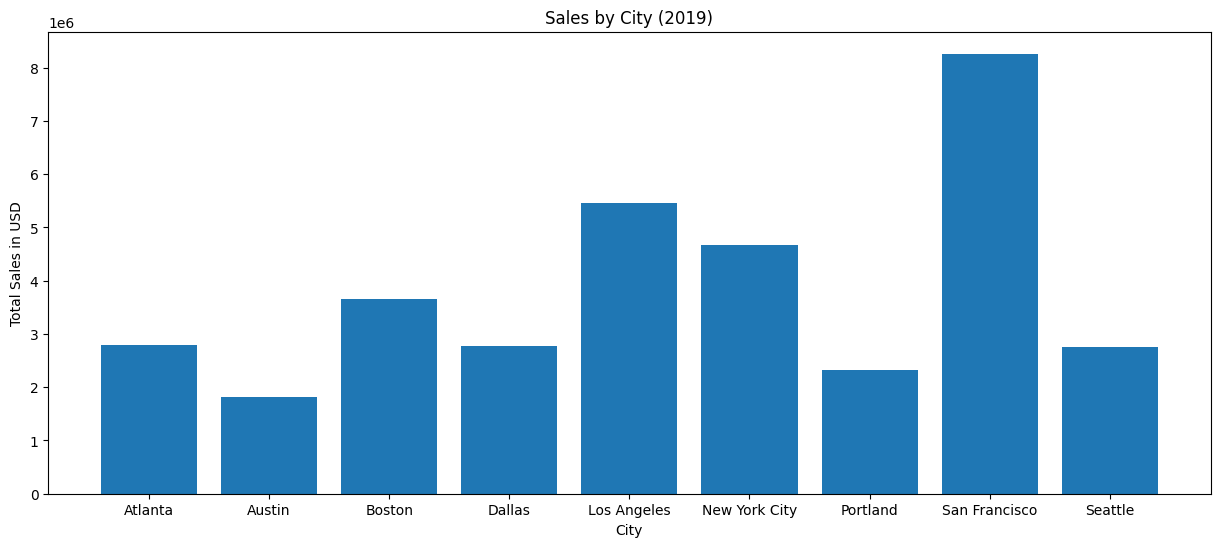

In [15]:
city_sales = adf.groupby('citys')['sales'].sum()
cities = city_sales.index
sales_values = city_sales.values

plt.figure(figsize=(15,6))
plt.bar(cities, sales_values)
plt.xticks(rotation=0)
plt.xlabel('City')
plt.ylabel('Total Sales in USD')
plt.title('Sales by City (2019)')
plt.show()

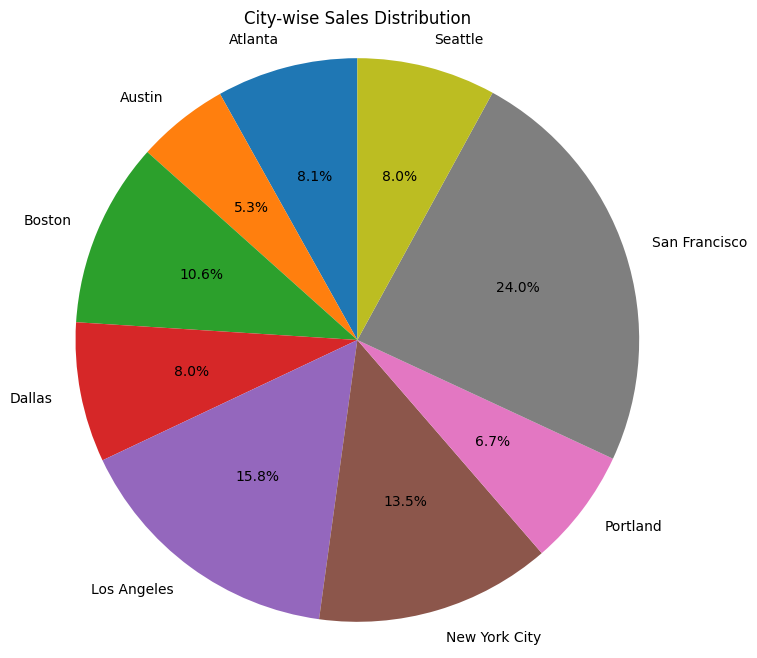

In [16]:
city_sales = adf.groupby('citys')['sales'].sum()
plt.figure(figsize=(8,8))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('City-wise Sales Distribution')
plt.axis('equal')
plt.show()


##4.3 Hourly Order Analysis
Understanding customer purchase behavior across different hours of the day.

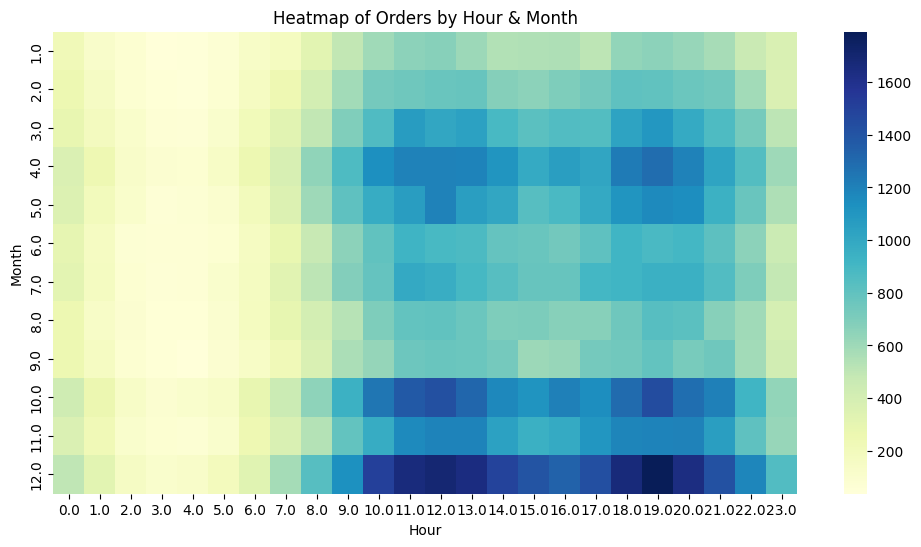

In [17]:
adf['hour'] = pd.to_datetime(adf['order_date']).dt.hour
hour_month = adf.groupby(['month', 'hour']).count()['order_id'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(hour_month, cmap='YlGnBu')
plt.title('Heatmap of Orders by Hour & Month')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()


##4.4 Most Sold Products
Finding the top 10 most frequently ordered products in 2019.

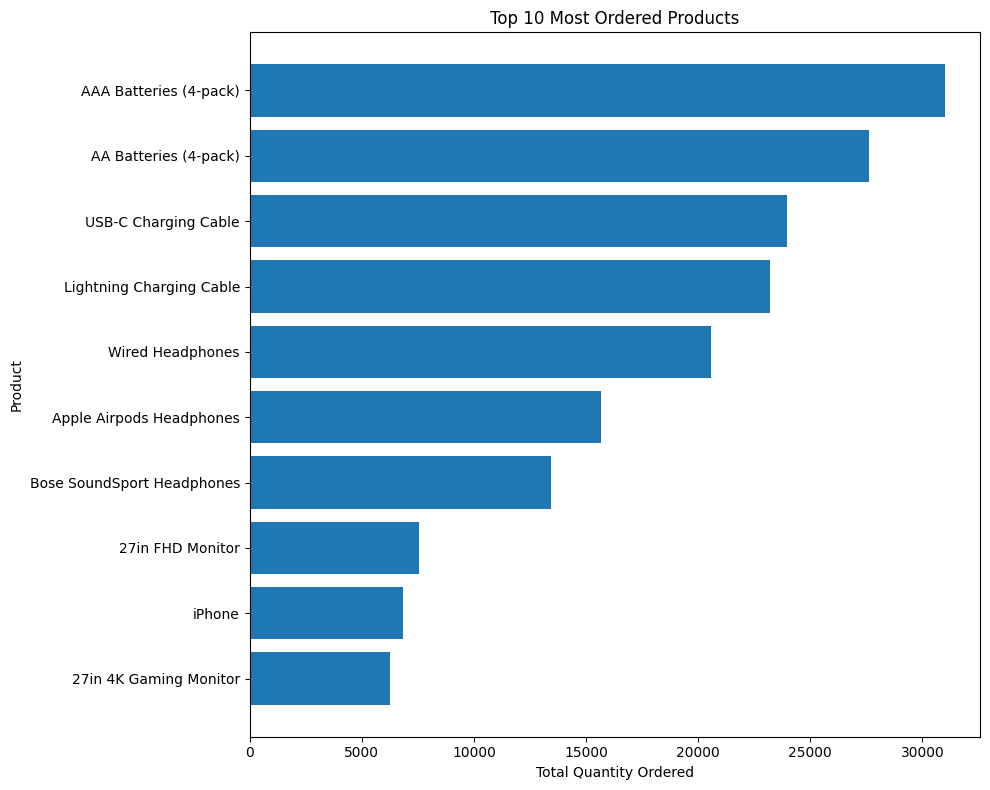

In [18]:
product_quantity = adf.groupby('product')['quantity_ordered'].sum()
product_quantity
top_products = product_quantity.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 8))
plt.barh(top_products.index, top_products.values)
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product')
plt.title('Top 10 Most Ordered Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##4.5 Sales Trend by Product Price
 Checking if cheaper or mid-range products sell more than expensive ones.

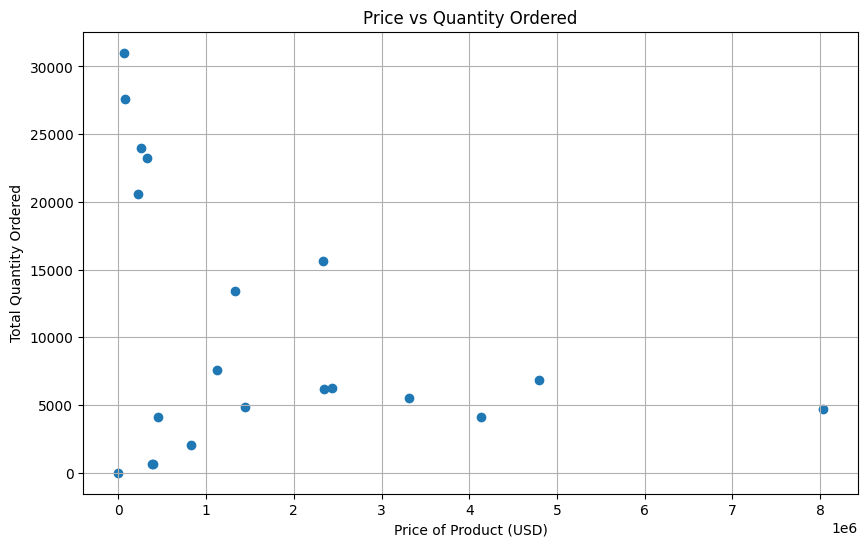

In [19]:
products = adf.groupby('product')[['quantity_ordered', 'price_each']].sum()
plt.figure(figsize=(10,6))
plt.scatter(products['price_each'], products['quantity_ordered'])
plt.xlabel('Price of Product (USD)')
plt.ylabel('Total Quantity Ordered')
plt.title('Price vs Quantity Ordered')
plt.grid()
plt.show()


## 5. Conclusion

This analysis of 2019 sales data uncovered several actionable insights that can guide strategic decisions in sales, marketing, and operations:

###Monthly Trends:
Sales peaked in **December**, likely driven by holiday shopping, followed by **October**. The lowest sales occurred in **January**, a common trend post-holiday season.

###City Performance:
**San Francisco** and **Los Angeles** emerged as top-performing cities in terms of total sales. Investigating factors such as population density, local promotions, or store presence may explain their strong performance. Cities like Portland and Austin also contributed significantly.

###Hourly Patterns:
Customer orders were highest around **11 AM** and **7 PM**, suggesting strong shopping activity during lunch breaks and evening hours. These patterns can inform decisions about staff scheduling and targeted advertising windows.

###Product Performance:
The most sold items were **AAA Batteries (4-pack)** and **AA Batteries (4-pack)**. A scatter plot analysis of product price vs. quantity ordered reveals a **negative correlation** — lower-priced items are sold in larger volumes, while higher-priced items sell less frequently.

### Final Thoughts:
This project highlights key business insights from sales data, such as seasonal trends, customer behavior, and product preferences. These findings can support:

*   Improved inventory planning .
*   City-wise sales strategies .
*   Time-based marketing campaigns .
*   Smarter product pricing .

By continuing to monitor these metrics and refining based on data, the business can drive more informed, data-backed decisions in the future.